In [1]:
# REF: https://stackoverflow.com/questions/33926704/converting-coordinates-vector-to-numpy-2d-matrix
# REF: https://matplotlib.org/stable/gallery/images_contours_and_fields/irregulardatagrid.html

In [2]:
# This particular example generates 100 random points x, y and z
# and grids them into a 200 x 200 grid using three different
# methods.  The stackoverflow post had to be updated to current
# matplotlib and scipy API.

#from matplotlib.mlab import griddata
from scipy.interpolate import griddata
import numpy as np
import matplotlib.pyplot as plt

#-- Your coordinates
x = np.random.random(100)
y = np.random.random(100)
z = np.random.random(100)*10
#--

#-- Your new grid
xsteps=200    # resolution in x
ysteps=200    # resolution in y
xi = np.linspace(min(x), max(x), xsteps)
yi = np.linspace(min(y), max(y), ysteps)
#Z = griddata(x, y, z, xi, yi)  # interpolates between points in your data
grid_z0 = griddata((x,y), z, (xi[None, :], yi[:, None]), method='nearest')
grid_z1 = griddata((x,y), z, (xi[None, :], yi[:, None]), method='linear')
grid_z2 = griddata((x,y), z, (xi[None, :], yi[:, None]), method='cubic')
#--


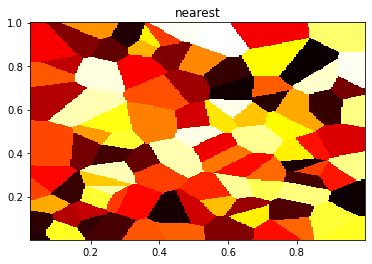

In [5]:
fig, ax = plt.subplots()
ax.pcolormesh(xi, yi, grid_z0, cmap=plt.cm.hot, shading='auto')   # plot your elevation map :D
ax.set_title('nearest')
plt.show()

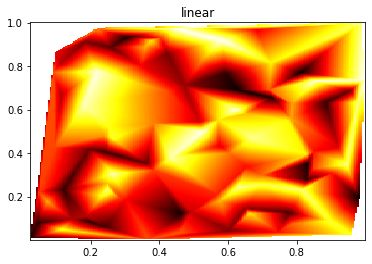

In [6]:
fig, ax = plt.subplots()
ax.pcolormesh(xi, yi, grid_z1, cmap=plt.cm.hot, shading='auto')   # plot your elevation map :D
ax.set_title('linear')
plt.show()

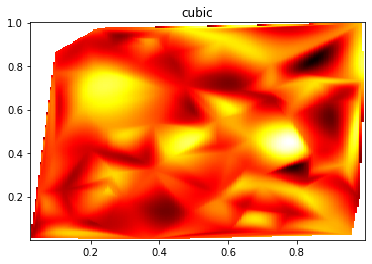

In [7]:
fig, ax = plt.subplots()
ax.pcolormesh(xi, yi, grid_z2, cmap=plt.cm.hot, shading='auto')   # plot your elevation map :D
ax.set_title('cubic')
plt.show()

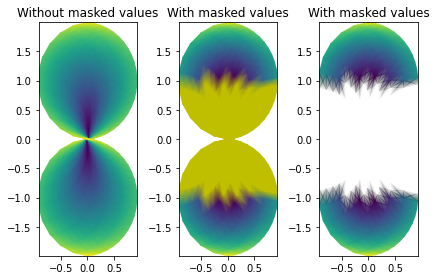

In [8]:
# REF: https://matplotlib.org/stable/gallery/images_contours_and_fields/quadmesh_demo.html#sphx-glr-gallery-images-contours-and-fields-quadmesh-demo-py
from matplotlib import cm, pyplot as plt
import numpy as np
import copy

n = 12
x = np.linspace(-1.5, 1.5, n)
y = np.linspace(-1.5, 1.5, n * 2)
X, Y = np.meshgrid(x, y)
Qx = np.cos(Y) - np.cos(X)
Qz = np.sin(Y) + np.sin(X)
Z = np.sqrt(X**2 + Y**2) / 5
Z = (Z - Z.min()) / (Z.max() - Z.min())

# The color array can include masked values.
Zm = np.ma.masked_where(np.abs(Qz) < 0.5 * np.max(Qz), Z)

fig, axs = plt.subplots(nrows=1, ncols=3)
axs[0].pcolormesh(Qx, Qz, Z, shading='gouraud')
axs[0].set_title('Without masked values')

# You can control the color of the masked region.
cmap = copy.copy(cm.get_cmap(plt.rcParams['image.cmap']))
#.with_extremes(bad='y')
cmap.set_bad('y')
axs[1].pcolormesh(Qx, Qz, Zm, shading='gouraud', cmap=cmap)
axs[1].set_title('With masked values')

# Or use the default, which is transparent.
axs[2].pcolormesh(Qx, Qz, Zm, shading='gouraud')
axs[2].set_title('With masked values')

fig.tight_layout()
plt.show()

In [9]:
# Working with image data vs gridded data where it may be important if you are plotting using
# data that is centered on a grid cell vs on an edge of the cell
# REF: https://matplotlib.org/stable/gallery/images_contours_and_fields/pcolormesh_grids.html

In [10]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

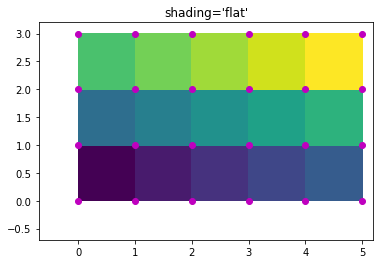

In [11]:
nrows = 3
ncols = 5
Z = np.arange(nrows * ncols).reshape(nrows, ncols)
x = np.arange(ncols + 1)
y = np.arange(nrows + 1)

fig, ax = plt.subplots()
ax.pcolormesh(x, y, Z, shading='flat', vmin=Z.min(), vmax=Z.max())


def _annotate(ax, x, y, title):
    # this all gets repeated below:
    X, Y = np.meshgrid(x, y)
    ax.plot(X.flat, Y.flat, 'o', color='m')
    ax.set_xlim(-0.7, 5.2)
    ax.set_ylim(-0.7, 3.2)
    ax.set_title(title)

_annotate(ax, x, y, "shading='flat'")

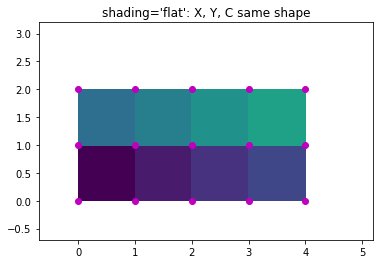

In [12]:
x = np.arange(ncols)  # note *not* ncols + 1 as before
y = np.arange(nrows)
fig, ax = plt.subplots()
ax.pcolormesh(x, y, Z[:-1, :-1], shading='flat', vmin=Z.min(), vmax=Z.max())
_annotate(ax, x, y, "shading='flat': X, Y, C same shape")

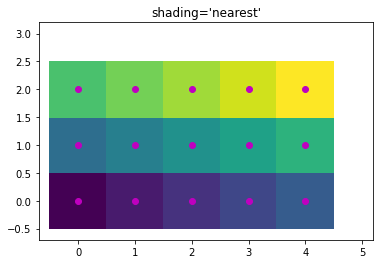

In [13]:
fig, ax = plt.subplots()
ax.pcolormesh(x, y, Z, shading='nearest', vmin=Z.min(), vmax=Z.max())
_annotate(ax, x, y, "shading='nearest'")

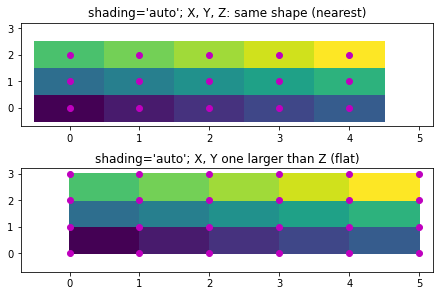

In [14]:
fig, axs = plt.subplots(2, 1, constrained_layout=True)
ax = axs[0]
x = np.arange(ncols)
y = np.arange(nrows)
ax.pcolormesh(x, y, Z, shading='auto', vmin=Z.min(), vmax=Z.max())
_annotate(ax, x, y, "shading='auto'; X, Y, Z: same shape (nearest)")

ax = axs[1]
x = np.arange(ncols + 1)
y = np.arange(nrows + 1)
ax.pcolormesh(x, y, Z, shading='auto', vmin=Z.min(), vmax=Z.max())
_annotate(ax, x, y, "shading='auto'; X, Y one larger than Z (flat)")

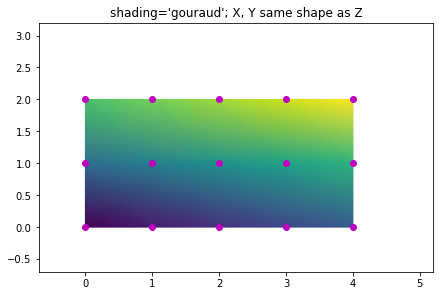

In [15]:
fig, ax = plt.subplots(constrained_layout=True)
x = np.arange(ncols)
y = np.arange(nrows)
ax.pcolormesh(x, y, Z, shading='gouraud', vmin=Z.min(), vmax=Z.max())
_annotate(ax, x, y, "shading='gouraud'; X, Y same shape as Z")

plt.show()